In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mplt
import os
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import f_oneway
from scipy.stats import normaltest
from scipy.stats import kruskal
from itertools import groupby

#set base path
path = r'C:\Users\Teddy\Documents\P30\AIRWISE\raw_data/'


s value is: 15956.010776509316
p value is: 0.0
s value is (outliers removed): 1502.4077078125247
p value is (outliers removed): 0.0
s value is: 17256.866317942266
p value is: 0.0
s value is (outliers removed): 2168.9149419386454
p value is (outliers removed): 0.0
s value is: 16327.185920293348
p value is: 0.0
s value is (outliers removed): 2270.1616153261543
p value is (outliers removed): 0.0
s value is: 10230.310211802178
p value is: 0.0
s value is (outliers removed): 1803.0013654104225
p value is (outliers removed): 0.0
s value is: 17758.580338902342
p value is: 0.0
s value is (outliers removed): 1309.2996650510213
p value is (outliers removed): 4.8886636199963815e-285
s value is: 24100.909194109612
p value is: 0.0
s value is (outliers removed): 1195.5040544296717
p value is (outliers removed): 2.5095337116027356e-260
s value is: 10847.000544550156
p value is: 0.0
s value is (outliers removed): 929.4016707252681
p value is (outliers removed): 1.5240228066763135e-202
s value is: 11367

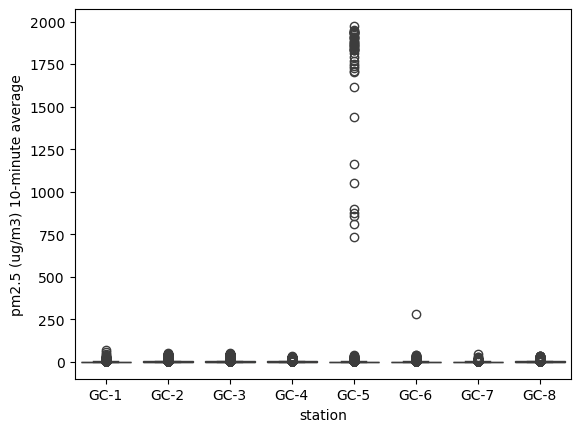

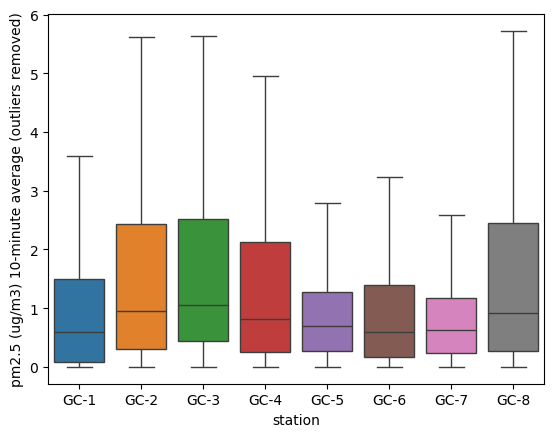

In [2]:
#create empty dict to hold station data
dfs = {}
dfs_or = {}
#dfsl = []

def drop_outliers_IQR(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1

    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return data[(data >= lower_bound) & (data <= upper_bound)]

#loop through station data CSVs
for root, dirs, files in os.walk(path):
    for file_name in files:
        if file_name.endswith('.csv'):
            file_path = os.path.join(root, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            #define pm2.5 data as array, append to dict
            #Data_type = object
            dfa = np.array(df['pm2.5_atm'])
            dfa_or = drop_outliers_IQR(dfa)
            #dfsl.append(dfa)
            dfs[f'{file_name[:4]}'] = dfa
            dfs_or[f'{file_name[:4]}'] = dfa_or

            s, p = normaltest(dfa, nan_policy='omit')
            print('s value is: ' + str(s))
            print('p value is: ' + str(p))

            s_or, p_or = normaltest(dfa_or, nan_policy='omit')
            print('s value is (outliers removed): ' + str(s_or))
            print('p value is (outliers removed): ' + str(p_or))

#create boxplot
bpc = sb.boxplot(dfs, orient='v').set(xlabel='station', ylabel='pm2.5 (ug/m3) 10-minute average')
plt.show()
bpc_or = sb.boxplot(dfs_or, orient='v', showfliers=False).set(xlabel='station', ylabel='pm2.5 (ug/m3) 10-minute average (outliers removed)')
plt.show()

          

In [3]:
ad = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dfs.items()]))
ad

,GC-1,GC-2,GC-3,GC-4,GC-5,GC-6,GC-7,GC-8
0,0.100,0.0290,0.080,0.310,0.8265,0.815,0.2320,0.1165
1,0.103,0.0070,0.506,0.136,0.5550,0.852,0.3110,0.8420
2,0.000,0.0000,0.121,0.249,0.7650,0.656,0.3620,0.0000
3,0.000,0.0120,0.030,0.382,0.6740,0.582,10.0765,0.0310
4,0.118,0.0000,0.073,0.092,0.7350,0.561,2.0440,0.0780
...,...,...,...,...,...,...,...,...
15554,NaN,1.4100,NaN,NaN,NaN,NaN,NaN,NaN
15555,NaN,1.1770,NaN,NaN,NaN,NaN,NaN,NaN
15556,NaN,0.9290,NaN,NaN,NaN,NaN,NaN,NaN
15557,NaN,0.9010,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ad_or = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dfs_or.items()]))
ad_or

,GC-1,GC-2,GC-3,GC-4,GC-5,GC-6,GC-7,GC-8
0,0.100,0.0290,0.080,0.310,0.8265,0.815,0.232,0.1165
1,0.103,0.0070,0.506,0.136,0.5550,0.852,0.311,0.8420
2,0.000,0.0000,0.121,0.249,0.7650,0.656,0.362,0.0000
3,0.000,0.0120,0.030,0.382,0.6740,0.582,2.044,0.0310
4,0.118,0.0000,0.073,0.092,0.7350,0.561,2.198,0.0780
...,...,...,...,...,...,...,...,...
14650,NaN,1.4100,NaN,NaN,NaN,NaN,NaN,NaN
14651,NaN,1.1770,NaN,NaN,NaN,NaN,NaN,NaN
14652,NaN,0.9290,NaN,NaN,NaN,NaN,NaN,NaN
14653,NaN,0.9010,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ad.describe()

,GC-1,GC-2,GC-3,GC-4,GC-5,GC-6,GC-7,GC-8
count,10446.000000,15559.000000,15554.000000,11572.000000,9353.000000,7835.000000,7735.000000,14020.000000
mean,1.275187,2.157553,2.477058,1.870553,9.420432,1.370703,1.115572,2.037324
std,2.161640,3.523817,4.142271,2.691954,120.064359,3.938211,1.627795,2.776276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.099625,0.327000,0.482250,0.274750,0.295000,0.194000,0.263000,0.301000
50%,0.668500,1.089000,1.206000,0.950000,0.758000,0.675000,0.690000,1.033000
75%,1.736750,2.803000,3.008750,2.512000,1.572000,1.702500,1.404500,2.855250
max,67.778000,49.689000,49.911000,32.775000,1974.279000,279.257000,49.259000,35.350000


In [7]:
ad_or.describe()

,GC-1,GC-2,GC-3,GC-4,GC-5,GC-6,GC-7,GC-8
count,9935.000000,14655.000000,14518.00000,10854.000000,8719.000000,7374.000000,7255.000000,13238.000000
mean,0.960076,1.543361,1.68419,1.370124,0.921996,0.933154,0.824909,1.556044
std,1.049247,1.545366,1.62916,1.408767,0.838207,0.959874,0.746446,1.611163
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.086000,0.299000,0.44500,0.248000,0.268000,0.177000,0.237500,0.267000
50%,0.587500,0.955000,1.06000,0.810500,0.690000,0.593000,0.621000,0.920000
75%,1.489000,2.426000,2.52400,2.131000,1.279500,1.398000,1.174500,2.449000
max,4.191000,6.516000,6.79700,5.858000,3.485000,3.956000,3.115000,6.684000


In [18]:
outpath = r'C:\Users\Teddy\Documents\P30\AIRWISE\Output_tables/'
ad.to_csv(outpath + 'datacomb.csv')

In [19]:
ad_or.to_csv(outpath + 'datacomb_or.csv')

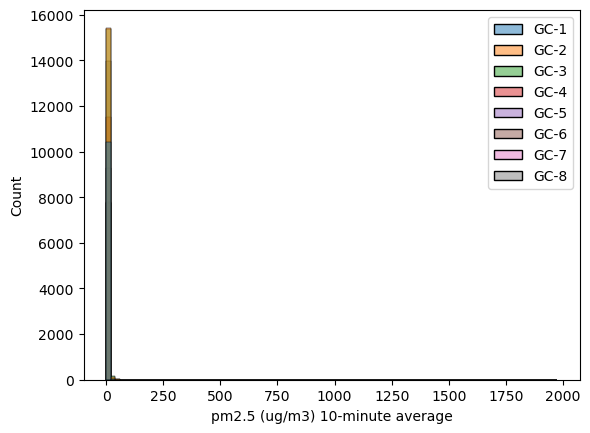

In [20]:
hpc = sb.histplot(ad, bins=100, binwidth=20).set(xlabel='pm2.5 (ug/m3) 10-minute average')

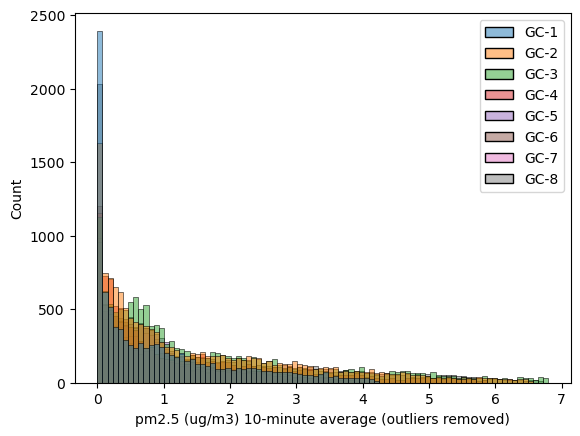

In [21]:
hpc_or = sb.histplot(ad_or).set(xlabel='pm2.5 (ug/m3) 10-minute average (outliers removed)')

In [22]:
adm = pd.melt(ad)
adm

,variable,value
0,GC-1,0.100
1,GC-1,0.103
2,GC-1,0.000
3,GC-1,0.000
4,GC-1,0.118
...,...,...
124467,GC-8,NaN
124468,GC-8,NaN
124469,GC-8,NaN
124470,GC-8,NaN


In [23]:
adm_or = pd.melt(ad_or)
adm_or

,variable,value
0,GC-1,0.100
1,GC-1,0.103
2,GC-1,0.000
3,GC-1,0.000
4,GC-1,0.118
...,...,...
117235,GC-8,NaN
117236,GC-8,NaN
117237,GC-8,NaN
117238,GC-8,NaN


In [24]:
adm_clean = adm.dropna()
adm_clean

,variable,value
0,GC-1,0.100
1,GC-1,0.103
2,GC-1,0.000
3,GC-1,0.000
4,GC-1,0.118
...,...,...
122928,GC-8,1.182
122929,GC-8,1.266
122930,GC-8,1.359
122931,GC-8,1.554


In [25]:
adm_clean_or = adm_or.dropna()
adm_clean_or

,variable,value
0,GC-1,0.100
1,GC-1,0.103
2,GC-1,0.000
3,GC-1,0.000
4,GC-1,0.118
...,...,...
115818,GC-8,1.182
115819,GC-8,1.266
115820,GC-8,1.359
115821,GC-8,1.554


In [26]:
adm_clean.to_csv(outpath + 'datacomb_melt.csv')

In [27]:
adm_clean_or.to_csv(outpath + 'datacomb_melt_or.csv')

In [28]:
result = adm_clean.groupby('variable')['value'].apply(list)
result

variable
GC-1    [0.1, 0.103, 0.0, 0.0, 0.118, 0.1065, 0.017, 0...
GC-2    [0.0289999999999999, 0.007, 0.0, 0.012, 0.0, 0...
GC-3    [0.08, 0.506, 0.121, 0.03, 0.073, 0.19, 0.007,...
GC-4    [0.31, 0.136, 0.249, 0.382, 0.092, 0.055, 0.16...
GC-5    [0.8265, 0.5549999999999999, 0.765, 0.67399999...
GC-6    [0.815, 0.8520000000000001, 0.6559999999999999...
GC-7    [0.2319999999999999, 0.311, 0.362, 10.0765, 2....
GC-8    [0.1165, 0.842, 0.0, 0.031, 0.078, 0.069, 0.12...
Name: value, dtype: object

In [29]:
result_or = adm_clean_or.groupby('variable')['value'].apply(list)
result_or

variable
GC-1    [0.1, 0.103, 0.0, 0.0, 0.118, 0.1065, 0.017, 0...
GC-2    [0.0289999999999999, 0.007, 0.0, 0.012, 0.0, 0...
GC-3    [0.08, 0.506, 0.121, 0.03, 0.073, 0.19, 0.007,...
GC-4    [0.31, 0.136, 0.249, 0.382, 0.092, 0.055, 0.16...
GC-5    [0.8265, 0.5549999999999999, 0.765, 0.67399999...
GC-6    [0.815, 0.8520000000000001, 0.6559999999999999...
GC-7    [0.2319999999999999, 0.311, 0.362, 2.044, 2.19...
GC-8    [0.1165, 0.842, 0.0, 0.031, 0.078, 0.069, 0.12...
Name: value, dtype: object

In [43]:
F, p = f_oneway(*result)
print(F)
print(p)

48.09180980107373
1.1984129552900656e-68


In [30]:
H, p = kruskal(*result)
print(H)
print(p)

2896.1551624234417
0.0


In [45]:
F, p = f_oneway(*result_or)
print(F)
print(p)

703.5641992227519
0.0


In [32]:
H, p = kruskal(*result_or)
print(H)
print(p)

3103.1651132884513
0.0
